In [3]:
import pandas as pd
import numpy as np

df = pd.read_csv("../../data/theses-soutenues-clean-with-index.csv")
print(f"size : {len(df)}")
df.head()

size : 164379


,CI,year,oai_set_specs,titres.en,resumes.en,lang_res.en,topics.en,titres.fr,resumes.fr,lang_res.fr,topics.fr,swapped
0,CI-0,2010.0,ddc:004,"ViSaGe project : VisageFS, a filesystem with a...","Nowdays, the grid computing enables solutions ...",EN,POSIX (norme),"Projet ViSaGe : VisageFS, systèmes de fichiers...",Les grilles informatiques permettent d'envisag...,FR,Entrepôts de données||Langages de programmatio...,NaN
1,CI-1,2012.0,ddc:570,Neural basis of glaucoma : a new approach comb...,Decreased visual motion sensitivity in early s...,EN,NaN,Bases neuronales du glaucome : une approche co...,La diminution précoce de la sensibilité au mou...,FR,Poursuite oculaire||Glaucome à angle ouvert,NaN
2,CI-2,2010.0,ddc:150,Richard Wagner and the Redemption's opera : co...,Richard Wagner's poetic and musical writing in...,EN,NaN,Richard Wagner et l’Opéra de la Rédemption : c...,L’écriture poétique et musicale de Richard Wag...,FR,"Musique -- 19e siècle -- Thèmes, motifs||Psych...",NaN
3,CI-3,2010.0,ddc:530,Investigation of temperature measurement of ma...,This work investigates the temperature measure...,EN,NaN,Contribution à la mesure de température des ma...,Le cadre de ces travaux concerne la mesure de ...,FR,Thermométrie||Pyrométrie||Choc (mécanique)||Ma...,NaN
4,CI-4,2012.0,ddc:796,Sociology of juvenile prison,Researches in social sciences that deal with t...,EN,NaN,Faire sa peine à l'établissement pénitentiaire...,Les recherches en sciences sociales s'intéress...,FR,Centres pour jeunes délinquants||Détention des...,NaN


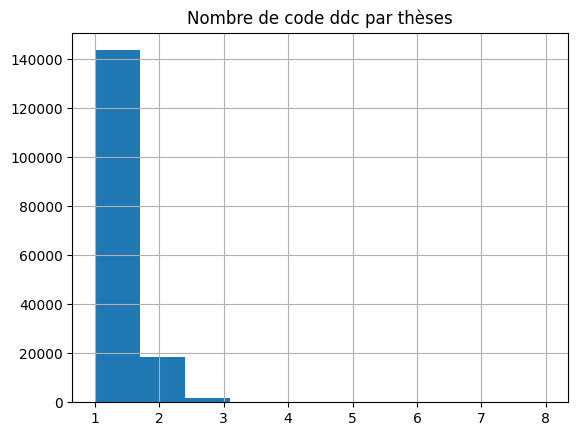

In [14]:
_ = (
    df["oai_set_specs"]
    .apply(lambda x : len(x.split("||")))
    .hist()
    .set_title("Nombre de code ddc par thèses")
)

In [19]:
df_to_plot = df.groupby(["oai_set_specs", "year"], as_index = False).size()
df_to_plot

,oai_set_specs,size
0,ddc:000,642
1,ddc:000||ddc:004,13
2,ddc:000||ddc:004||ddc:410,1
3,ddc:000||ddc:020,1
4,ddc:000||ddc:020||ddc:380,1
...,...,...
3420,ddc:980||ddc:970||ddc:460,1
3421,ddc:990,14
3422,ddc:990||ddc:720||ddc:730||ddc:940,1
3423,ddc:990||ddc:900,1


In [20]:
import plotly.express as px

px.line(
    (
        df
        .groupby(["oai_set_specs", "year"], as_index = False)
        .size()
    ), 
    x = "year", 
    y = "size", 
    color = "oai_set_specs"
)